**Prediction of Traffic Volume for Metro Trains Using Regression Techniques**

In [1]:

import numpy as np 
import pandas as pd

In [2]:
import pandas as pd

In [5]:
data = pd.read_csv("C://Users//FARNANDO//OneDrive//Desktop//pga project//Mini projects//Indian Metro//Train.csv")

In [6]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [7]:
data.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

In [8]:
data.shape

(33750, 15)

In [9]:
data.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [10]:
data.traffic_volume

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
33745    2348
33746    2194
33747    2194
33748    1328
33749    1328
Name: traffic_volume, Length: 33750, dtype: int64

In [11]:
data.weather_type.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [12]:
data.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

array([[<AxesSubplot:title={'center':'air_pollution_index'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'wind_direction'}>,
        <AxesSubplot:title={'center':'visibility_in_miles'}>,
        <AxesSubplot:title={'center':'dew_point'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'rain_p_h'}>,
        <AxesSubplot:title={'center':'snow_p_h'}>],
       [<AxesSubplot:title={'center':'clouds_all'}>,
        <AxesSubplot:title={'center':'traffic_volume'}>, <AxesSubplot:>]],
      dtype=object)

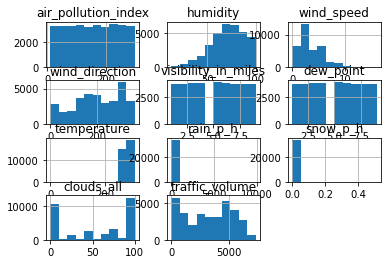

In [13]:
data.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f11726c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f11726cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f11726c070>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1172782b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f117278640>],
 'means': []}

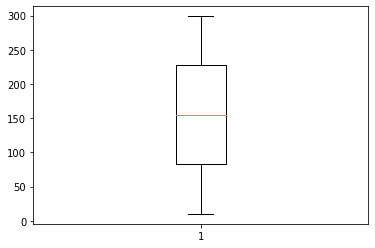

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(data.air_pollution_index)
#plt.boxplot([data.humidity,data.air_pollution_index])

In [15]:
data.corr()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
air_pollution_index,1.000000,-0.000277,-0.004166,0.000749,0.003499,0.003499,0.005368,0.000443,0.007227,-0.008541,-0.003751
humidity,-0.000277,1.000000,-0.147042,-0.046268,0.005510,0.005510,0.033273,-0.012161,0.016625,0.014520,0.016455
wind_speed,-0.004166,-0.147042,1.000000,0.191320,-0.005160,-0.005160,-0.052856,0.001165,-0.006534,-0.004456,0.016329
wind_direction,0.000749,-0.046268,0.191320,1.000000,0.000716,0.000716,-0.045843,0.002230,0.000321,0.020392,0.014278
visibility_in_miles,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348
dew_point,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348
temperature,0.005368,0.033273,-0.052856,-0.045843,0.000760,0.000760,1.000000,0.011071,-0.020721,-0.121334,0.127871
rain_p_h,0.000443,-0.012161,0.001165,0.002230,-0.008301,-0.008301,0.011071,1.000000,-0.000159,0.005206,0.005642
snow_p_h,0.007227,0.016625,-0.006534,0.000321,0.001453,0.001453,-0.020721,-0.000159,1.000000,0.032591,0.001197
clouds_all,-0.008541,0.014520,-0.004456,0.020392,-0.001582,-0.001582,-0.121334,0.005206,0.032591,1.000000,0.037922


In [16]:
data.corr().traffic_volume.sort_values()[::-1]

traffic_volume         1.000000
temperature            0.127871
clouds_all             0.037922
humidity               0.016455
wind_speed             0.016329
wind_direction         0.014278
rain_p_h               0.005642
dew_point              0.001348
visibility_in_miles    0.001348
snow_p_h               0.001197
air_pollution_index   -0.003751
Name: traffic_volume, dtype: float64

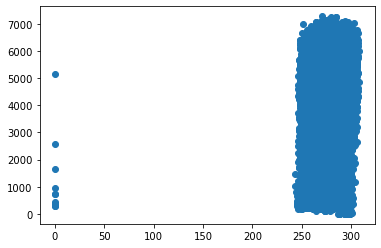

In [17]:
plt.scatter(data.temperature,data.traffic_volume)

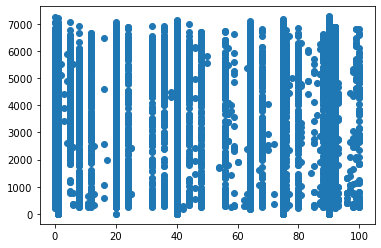

In [18]:
plt.scatter(data.clouds_all,data.traffic_volume)

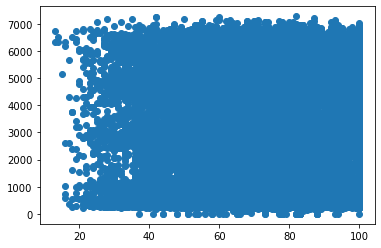

In [19]:
plt.scatter(data.humidity,data.traffic_volume)

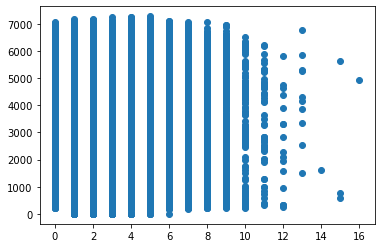

In [20]:
plt.scatter(data.wind_speed,data.traffic_volume)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f117d87a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f117d961f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f117d876d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f117d96910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f117d96ca0>],
 'means': []}

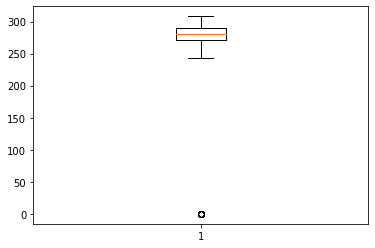

In [21]:
plt.boxplot(data.temperature)

<AxesSubplot:>

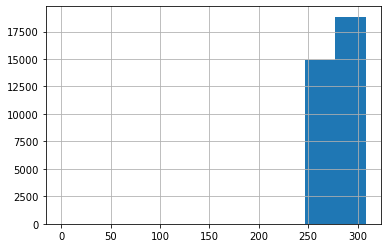

In [22]:
data.temperature.hist()

In [23]:
data.temperature.quantile(0.0003)

243.418681

In [24]:
data.shape

(33750, 15)

In [25]:
data1 = data[data.temperature>(data.temperature.quantile(0.0003))]

In [26]:
data1.shape

(33739, 15)

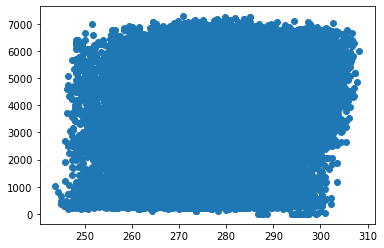

In [27]:
plt.scatter(data1.temperature,data1.traffic_volume)

In [28]:
data_x=data1[data1.columns[0:-1]]

In [29]:
data_x

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,2017-05-17 21:00:00,None,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist
33746,2017-05-17 22:00:00,None,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain
33747,2017-05-17 22:00:00,None,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist
33748,2017-05-17 23:00:00,None,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain


In [30]:
data_y=data1.traffic_volume

In [31]:
data_y

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
33745    2348
33746    2194
33747    2194
33748    1328
33749    1328
Name: traffic_volume, Length: 33739, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [33]:
print(data_x.dtypes)
data_x=data_x[data_x.columns[2:-2]]
print(data_x.dtypes)


date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
dtype: object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
dtype: object


C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_x = train_x[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_y = train_y[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_x = test_x[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is dep

train MSE:  3981705.003547528
test MSE:  3927144.3832975915
train MSE:  3960618.9591100053
test MSE:  3974889.2648946787
train MSE:  3940198.461183623
test MSE:  4022550.5407340503
train MSE:  3963266.911059212
test MSE:  3968585.9475761824
train MSE:  3940704.208746101
test MSE:  4023128.088199322
train MSE:  3961326.7323285667


C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_x = train_x[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_y = train_y[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_x = test_x[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is dep

test MSE:  3975110.5122239413
train MSE:  3899386.8764229007
test MSE:  3894721.697198346
train MSE:  3980881.803343845
test MSE:  24005715.12099024
train MSE:  3958875.8011713433
test MSE:  3981170.1941253175
train MSE:  3940928.5903447205
test MSE:  4003859.8769858615


C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_x = train_x[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_y = train_y[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_x = test_x[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/369135151.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is dep

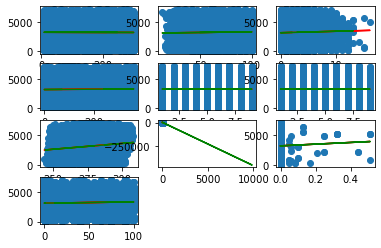

In [34]:
res = {}
c=1
for col in data_x.columns:
    
    train_x, test_x, train_y, test_y = train_test_split(data_x[col],data_y, test_size=0.3)
    train_x = train_x[:,np.newaxis]
    train_y = train_y[:,np.newaxis]
    test_x = test_x[:,np.newaxis]
    test_y = test_y[:,np.newaxis]
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(train_x)
    pred_test=lm.predict(test_x)
    plt.subplot(4,3,c)
    plt.scatter(train_x,train_y)
    plt.plot(train_x,pred,'r')
    plt.plot(test_x,pred_test,'g')
    c+=1
    print('train MSE: ', mean_squared_error(train_y,pred))
    print('test MSE: ', mean_squared_error(test_y,pred_test))

    trainRMSE = np.sqrt(mean_squared_error(train_y,pred))
    testRMSE = np.sqrt(mean_squared_error(test_y,pred_test))
    cname='Traffic Volume vs '+col
    res[cname]=[trainRMSE, testRMSE]

In [35]:
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y, test_size=0.3)
#train_x = train_x[:,np.newaxis]
train_y = train_y[:,np.newaxis]
#test_x = test_x[:,np.newaxis]
test_y = test_y[:,np.newaxis]
lm=LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(train_x)
pred_test=lm.predict(test_x)
#plt.scatter(train_x,train_y)
#plt.plot(train_x,pred,'r')
#plt.plot(test_x,pred_test,'g')
print('train MSE: ', mean_squared_error(train_y,pred))
print('test MSE: ', mean_squared_error(test_y,pred_test))

trainRMSE = np.sqrt(mean_squared_error(train_y,pred))
testRMSE = np.sqrt(mean_squared_error(test_y,pred_test))
cname='Traffic Volume vs All Columns'
res[cname]=[trainRMSE, testRMSE]

train MSE:  3876902.170322869
test MSE:  3890934.17563157


C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/208430121.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_y = train_y[:,np.newaxis]
C:\Users\FARNANDO\AppData\Local\Temp/ipykernel_6812/208430121.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_y = test_y[:,np.newaxis]


In [36]:
res

{'Traffic Volume vs air_pollution_index': [1995.4210090974607,
  1981.702395239404],
 'Traffic Volume vs humidity': [1990.1303874646017, 1993.7124328484986],
 'Traffic Volume vs wind_speed': [1984.9933151483465, 2005.6297117698596],
 'Traffic Volume vs wind_direction': [1990.795547277322, 1992.1310066298809],
 'Traffic Volume vs visibility_in_miles': [1985.1207038228433,
  2005.7736881810276],
 'Traffic Volume vs dew_point': [1990.3082003369645, 1993.7679183455484],
 'Traffic Volume vs temperature': [1974.6865261157025, 1973.5049270772915],
 'Traffic Volume vs rain_p_h': [1995.2147261244452, 4899.562747938865],
 'Traffic Volume vs snow_p_h': [1989.692388579537, 1995.2869954283062],
 'Traffic Volume vs clouds_all': [1985.1772188761186, 2000.9647365673043],
 'Traffic Volume vs All Columns': [1968.9850609699579, 1972.545101038648]}

In [37]:
resdf = pd.DataFrame(res, index = ['Train RMSE', 'Test RMSE'])
resdf = resdf.T

In [38]:
resdf

,Train RMSE,Test RMSE
Traffic Volume vs air_pollution_index,1995.421009,1981.702395
Traffic Volume vs humidity,1990.130387,1993.712433
Traffic Volume vs wind_speed,1984.993315,2005.629712
Traffic Volume vs wind_direction,1990.795547,1992.131007
Traffic Volume vs visibility_in_miles,1985.120704,2005.773688
Traffic Volume vs dew_point,1990.308200,1993.767918
Traffic Volume vs temperature,1974.686526,1973.504927
Traffic Volume vs rain_p_h,1995.214726,4899.562748
Traffic Volume vs snow_p_h,1989.692389,1995.286995
Traffic Volume vs clouds_all,1985.177219,2000.964737


<AxesSubplot:>

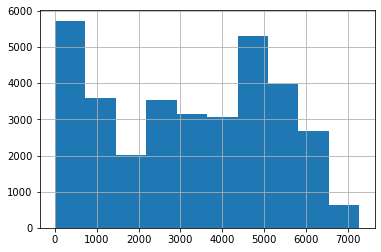

In [39]:
data1.traffic_volume.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f11e7cc9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f11e7da130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f11e7cc640>],
 'medians': [<matplotlib.lines.Line2D at 0x1f11e7da880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f11e7dac10>],
 'means': []}

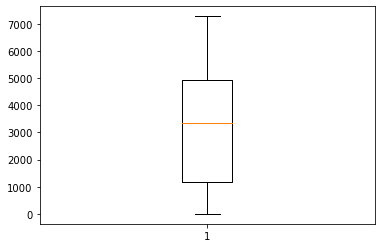

In [40]:
plt.boxplot(data1.traffic_volume)

As per our observation, the regression of Traffic Volume is not strongly depending on any of the attributes.
The RMSE for test data is around 2000 which is better than nothing to predict. 